In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [3]:
df_detail = pd.read_csv("CB Horizon Daily Detail Data 2018.csv")

In [4]:
df_detail.head(5)

,Arrival Time,Check In Date,Completion Date,Customer Facing Flag,Customer Key,DCV Ind,DTV Ind,Director,Drive Time Points,Dwelling Type,...,Supervisor,Survey Response Value,Technician,Truck Roll Ind,Verified Vendor,Work Order Category,Work Order Class,Work Order Number,Work Order Type,Zip Code
0,6/18/2018 10:52:00 AM,6/18/2018 11:17:00 AM,6/18/2018 11:16:00 AM,Y,71479796,0,0,OPEN,2,MDU,...,Brian Ginley,NaN,STEVE HEUSER,1,N,SRO,D,7219822,Sro,44147
1,5/16/2018 2:46:00 PM,6/5/2018 2:46:00 PM,5/16/2018 2:46:00 PM,Y,106221992,0,0,NaN,2,MDU,...,NaN,NaN,S SHORE UNDERGOUNDS 70546,1,N,SRO,C,7266786,Sro,44116
2,5/16/2018 12:06:00 PM,5/16/2018 12:06:00 PM,5/16/2018 12:06:00 PM,Y,104665149,0,0,OPEN,2,Non-Residential,...,Brian Ginley,NaN,STEVE HEUSER,1,N,Install,D,7329298,Install,44130
3,7/2/2018 8:03:00 AM,7/2/2018 10:11:00 AM,7/2/2018 10:10:00 AM,Y,20863595,0,0,OPEN,2,Non-Residential,...,Brian Ginley,NaN,ORION OWENS,1,N,Install,D,7378704,Upgrade,44126
4,5/8/2018 8:04:00 AM,5/8/2018 10:45:00 AM,5/8/2018 10:44:00 AM,Y,106922354,0,0,OPEN,2,Non-Residential,...,Brian Ginley,NaN,ORION OWENS,1,N,Install,*,7380975,Install,44107


In [41]:
df_detail['Arrival Time'] = pd.to_datetime(df_detail['Arrival Time'], errors = 'coerce')
df_detail['Check In Date'] = pd.to_datetime(df_detail['Check In Date'], errors = 'coerce')
#df_detail['Completion Date'] = pd.to_datetime(df_detail['Completion Date'], errors = 'coerce')

In [42]:
df_detail['Total Time'] = (df_detail['Check In Date'] - df_detail['Arrival Time']).dt.total_seconds() / 60
df_detail['Month'] = df_detail['Check In Date'].map(lambda x: str(x.month))
df_detail['Hour'] = df_detail['Check In Date'].map(lambda x: x.hour)
# df_detail['Month'] = df_detail['Month'].to_string()
# df_detail['Hour'] = df_detail['Hour'].to_string()

In [43]:
df_detail.head(2)

,Arrival Time,Check In Date,Completion Date,Customer Facing Flag,Customer Key,DCV Ind,DTV Ind,Director,Drive Time Points,Dwelling Type,...,Truck Roll Ind,Verified Vendor,Work Order Category,Work Order Class,Work Order Number,Work Order Type,Zip Code,Total Time,Month,Hour
0,2018-06-18 10:52:00,2018-06-18 11:17:00,6/18/2018 11:16:00 AM,Y,71479796,0,0,OPEN,2,MDU,...,1,N,SRO,D,7219822,Sro,44147,25.0,6,11
1,2018-05-16 14:46:00,2018-06-05 14:46:00,5/16/2018 2:46:00 PM,Y,106221992,0,0,NaN,2,MDU,...,1,N,SRO,C,7266786,Sro,44116,28800.0,6,14


In [44]:
#df_detail.info()

In [45]:
df_subset = df_detail.drop(columns=['Arrival Time','Check In Date','Completion Date'])
df_subset = df_subset.drop(columns=['Customer Key','Director','Employee Type Group','Entered By Employee Typ Group'])
df_subset = df_subset.drop(columns=['Entered By Employee Type Code','Entered By Employee Type Desc','Entered By Labor Type','Entered By Name','Technician'])
df_subset = df_subset.drop(columns=['Entered Date','FSI Ind','Field Tech Ind','Installer ID','Manager'])
df_subset = df_subset.drop(columns=['Number of Records','Site Code','Supervisor'])
df_subset = df_subset.drop(columns=['Work Order Category','Job Code Desc','Work Order Number'])
df_subset = df_subset.drop(columns=['Entered By Site','NPS Status','Service Call Product'])
df_subset = df_subset.drop(columns=['Repeat Solution Code - Ops','Repeat Solution Code - iDrive','Repeat Solution Desc - Ops','Repeat Solution Desc - iDrive','Repeat Solution Functional Group - Ops','Repeat Solution Group - Ops','Repeat Solution Group - iDrive','Repeat Work Order Entered Date - Ops','Repeat Work Order Number - Ops','Repeat Work Order Number - iDrive','Solution Code','Solution Desc','Solution Functional Group','Solution Group'])
df_subset = df_subset.drop(columns=['Fidning Code','Filtered Finding Ind','Filtered Solution Ind','Finding Desc'])
df_subset = df_subset.drop(columns=['Finding Functional Group','Finding Group'])
df_subset = df_subset.drop(columns=['Sub System','Zip Code','Node'])
df_subset = df_subset.drop(columns=['Repeat DCV Ind - Ops',
'Repeat DTV Ind - Ops',
'Repeat Filtered Finding Ind - Ops',
'Repeat Filtered Finding Ind - iDrive',
'Repeat Filtered Solution Ind - Ops',
'Repeat Finding Code - Ops',
'Repeat Finding Code - iDrive',
'Repeat Finding Desc - Ops',
'Repeat Finding Desc - iDrive',
'Repeat Finding Functional Group - Ops',
'Repeat Finding Group - Ops',
'Repeat Finding Group - iDrive',
'Repeat Interval - Ops',
'Repeat Interval - iDrive',
'Repeat Points',
'Repeat Service Call Product - Ops'])
df_subset = df_subset.drop(columns=['QC Chargeback Amount','QC Chargeback Eligibility','QC Inspection Opportunities','QC Inspection Passes','QC Remote Inspection','QC iDrive Eligibility'])
df_subset = df_subset.drop(columns=['Repeat Filtered Solution Ind - iDrive','Repeat Flag - iDrive','Office Only Flag Key'])

In [46]:
df_subset2 = df_subset[df_subset['Total Time'].notnull()]
#df_subset2 = df_subset2[df_subset2['New Time'] > 1]  
#df_subset2 = df_subset2[df_subset2 < 400]  

indexNames = df_subset2[ df_subset2['Total Time'] < 1 ].index
df_subset2.drop(indexNames , inplace=True)

indexNames = df_subset2[ df_subset2['Total Time'] > 400 ].index
df_subset2.drop(indexNames , inplace=True)

/Users/rsimon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
df_survey_subset = df_subset2[df_subset2['Survey Response Value'].notnull()]
df_nosurvey_subset = df_subset2[df_subset2['Survey Response Value'].isnull()]

In [72]:
df_nosurvey_subset.head()

,Customer Facing Flag,DCV Ind,DTV Ind,Drive Time Points,Dwelling Type,Employee Type Code,HC Equipment Passed,HC Equipment,Job Type,Labor Type,...,Region,Service Call Ind,Site,Truck Roll Ind,Verified Vendor,Work Order Class,Work Order Type,Total Time,Month,Hour
0,Y,0,0,2,MDU,5I,1,1,SRO,In House,...,Northeast Region,0,Cleveland,1,N,D,Sro,25.0,6,11
3,Y,0,0,2,Non-Residential,5I,1,1,Install,In House,...,Northeast Region,0,Cleveland,1,N,D,Upgrade,128.0,7,10
4,Y,0,0,2,Non-Residential,5I,1,1,Install,In House,...,Northeast Region,0,Cleveland,1,N,*,Install,161.0,5,10
5,Y,0,0,2,Non-Residential,5I,1,1,Install,In House,...,Northeast Region,0,Cleveland,1,N,*,Install,92.0,5,9
6,Y,0,0,2,Non-Residential,5I,2,2,Install,In House,...,Northeast Region,0,Cleveland,1,N,*,Downgrade,26.0,5,10


In [49]:
df_nosurvey_subset.drop(columns=['Survey Response Value'] , inplace=True)
df_nosurvey_subset.describe()

,DCV Ind,DTV Ind,Drive Time Points,HC Equipment Passed,HC Equipment,Points,Service Call Ind,Truck Roll Ind,Total Time,Hour
count,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000
mean,0.027972,0.007385,2.984887,0.773250,0.801780,26.582664,0.150078,0.956194,123.669934,14.067896
std,0.164892,0.085620,0.209271,1.198638,1.235705,27.440311,0.357149,0.204665,111.047073,3.717808
min,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000,0.000000,1.000000,37.000000,11.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000,0.000000,1.000000,90.000000,14.000000
75%,0.000000,0.000000,3.000000,1.000000,1.000000,33.000000,0.000000,1.000000,183.000000,16.000000
max,1.000000,1.000000,6.000000,29.000000,29.000000,2343.000000,1.000000,1.000000,400.000000,23.000000


In [50]:
#pandas_profiling.ProfileReport(df_nosurvey_subset)

In [51]:
nosurvey_drivetimepoints = df_nosurvey_subset['Drive Time Points']

In [52]:
nosurvey_points = df_nosurvey_subset['Points']

In [53]:
nosurvey_y = df_nosurvey_subset['Total Time']

In [54]:
# Calculate the absolute errors
errors = abs(nosurvey_points*5 - nosurvey_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 95.89 minutes.


In [55]:
nosurvey_X = df_nosurvey_subset.drop(columns=['Drive Time Points','Points','Total Time'])

In [73]:
feaImp_X = nosurvey_X[['Work Order Type','Service Call Ind','Hour',
            'Work Order Class','HC Equipment','HC Equipment Passed',
           'Truck Roll Ind','Q Code','Month','Work Order Class','Site',
           'Dwelling Type','Customer Facing Flag']]

In [74]:
# nosurvey_X = sm.add_constant(nosurvey_X)
#dum_ns_X = pd.get_dummies(nosurvey_X)
dum_ns_X = pd.get_dummies(feaImp_X)

In [75]:
# dum_ns_X.info()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(dum_ns_X, nosurvey_y, test_size = 0.2, random_state = 0)

In [77]:
# model=sm.OLS(y_train, X_train)
# model = model.fit()
# model.summary()

In [78]:
# regressor = LinearRegression()  
# regressor.fit(X_train, y_train) #training the algorithm

# print(regressor.intercept_)
# print(regressor.coef_)

In [79]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

In [80]:
# y_pred = regressor.predict(X_test)

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [81]:
X_train.head()

,Service Call Ind,Hour,HC Equipment,HC Equipment Passed,Truck Roll Ind,Work Order Type_Disconnect,Work Order Type_Downgrade,Work Order Type_Install,Work Order Type_Restart,Work Order Type_Sro,...,Site_Rhode Island,Site_Roanoke,Site_San Diego,Site_Santa Barbara,Site_Tulsa,Dwelling Type_MDU,Dwelling Type_Non-Residential,Dwelling Type_SFU,Customer Facing Flag_N,Customer Facing Flag_Y
79370,1,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
191837,0,12,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148450,1,21,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
241790,0,11,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
225261,0,11,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [82]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [83]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 52.23 minutes.


Feature ranking:
                                 importance
Work Order Type_Trouble Call   2.626126e-01
Service Call Ind               2.519830e-01
Hour                           1.122556e-01
Work Order Type_Install        2.932270e-02
Work Order Class_*             2.620073e-02
Work Order Class_*             2.139174e-02
HC Equipment                   1.989621e-02
Truck Roll Ind                 1.954326e-02
Q Code_W                       1.648039e-02
HC Equipment Passed            1.450315e-02
Q Code_I                       1.074521e-02
Month_5                        9.638617e-03
Month_7                        9.618495e-03
Month_8                        9.566700e-03
Month_10                       9.336465e-03
Month_9                        9.210001e-03
Month_6                        9.124154e-03
Month_11                       9.067353e-03
Month_12                       8.756799e-03
Site_Phoenix                   8.613940e-03
Site_San Diego                 7.693308e-03
Site_Las Vegas 

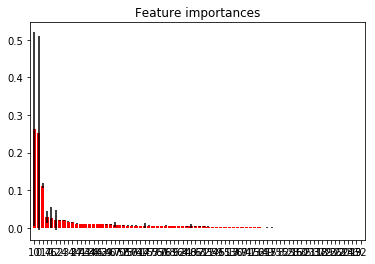

In [84]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Print the feature ranking
print("Feature ranking:")
print(feature_importances)

# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

/Users/rsimon/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/rsimon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/rsimon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [31]:
mlp = MLPRegressor(hidden_layer_sizes=(20,15,10,5),max_iter=200)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(151868, 93)
(37967, 93)
(151868,)
(37967,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [32]:
mlp.fit(X_train,y_train)

/Users/rsimon/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
predictions = mlp.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 49.62 minutes.


In [65]:
# for i,j in zip(predictions,y_test):
#     print("{}\t{}".format(i,j))

# Work Order Class	Work Order Number
# *	3800201
# *	3829243
# *	3829283
# D	3835451
# *	3836737
# *	3839607
# *	3840566
# *	3840780
# *	3840844
# *	3841260
# T	3841453
# *	3841873
# T	3841882
# *	3841892
# T	3841901
# T	3841909
# *	3841934
# *	3841941
# *	3841950
# D	3843506
# D	3846496
# *	3846734
# T	3846747
# *	3846773